# Introduction to the Baxter Robot by Rethink Robotics

This notebook provides an introduction to the Baxter Robot and how it can be used in our project involving synchronized performance with our robot cellist.

## Overview

Baxter is a two-armed, humanoid industrial robot developed by Rethink Robotics. It is designed for safe, interactive, and flexible manipulation tasks. It features:
- Two 7-DOF arms
- LCD screen face with facial expressions
- Force sensors for compliant motions
- Cameras for vision-based interaction
- ROS support for research-grade programming

In our lab, Baxter will play percussion instruments (like drums) alongside our UR5e cello-playing robot. This enables a novel Human-Robot Interaction (HRI) study in musical collaboration between two robotic musicians and humans.

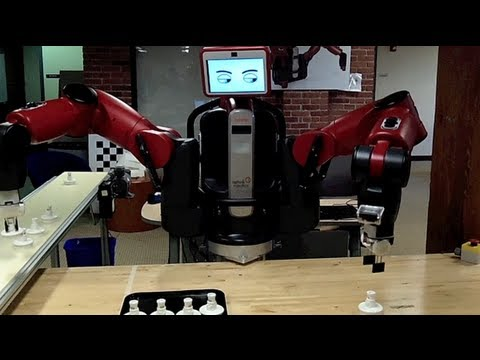

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo("gXOkWuSCkRI", width=560, height=315)

## Programming the Baxter Robot

Baxter can be programmed using Python with the ROS (Robot Operating System) framework. Rethink Robotics has created a Python interface for the Baxter SDK which makes programming much easier: https://github.com/RethinkRobotics/baxter_interface. However, a fun consequence of the Baxter robot's discontinuation in 2018 is that all of the documentation/information links provided on this GitHub page no longer work. Therefore, the only form of documentation you recieve is a brief README. Good luck! 

## Setup

To program the robot, you first need a compatible environment that supports ROS Indigo, which Baxter’s SDK is built for. You might be thinking, ROS Indigo?? That's so old! Yes. And Ubuntu 14.04??? Yes. Anyways, below is a step-by-step guide to setting up your system.


### Step 1: Install a Linux Virtual Machine

I seriously doubt that anyone on the project has a Ubuntu 14.04 native machine, and so you will need to run **Ubuntu 14.04** inside a virtual machine instead. This version is what's required for ROS Indigo, which is what's required for our robot's SDK. 

#### Recommended:
- **Virtual Machine Software**:
  - [VMware Workstation Player](https://www.vmware.com/products/workstation-player.html) (Windows)
  - [VMware Fusion Player](https://www.vmware.com/products/fusion.html) (macOS)
- **Ubuntu Version**: [Ubuntu 14.04.5 LTS 64-bit](https://releases.ubuntu.com/14.04/ubuntu-14.04.5-desktop-amd64.iso)
- **VM Resources**:
  - 2 CPUs
  - 4 GB RAM
  - 20+ GB disk space
- Enable **Bridged Networking** (not NAT)

> ⚠️ Make sure to enable **Bridged Networking** mode (not NAT). This ensures your VM is on the same network as the Baxter robot.

---

### Step-by-Step Guide: Installing Ubuntu on VMware

1. **Download VMware Player/Fusion**  
   Install [VMware Workstation Player](https://www.vmware.com/products/workstation-player.html) for Windows or [VMware Fusion Player](https://www.vmware.com/products/fusion.html) for macOS.

2. **Download Ubuntu 14.04.5 ISO**  
   Get the official ISO: [ubuntu-14.04.5-desktop-amd64.iso](https://releases.ubuntu.com/14.04/ubuntu-14.04.5-desktop-amd64.iso)

3. **Create a New Virtual Machine**
   - Open VMware and click “Create a New Virtual Machine”
   - Choose “Installer disc image file (iso)” and browse to the Ubuntu ISO
   - Select “Linux” as the OS type and “Ubuntu 64-bit” as the version
   - Name your VM (e.g. `baxter-vm`)

4. **Allocate VM Resources**
   - Memory: Set to at least 4096 MB (4 GB)
   - Processors: 2 cores recommended
   - Disk size: At least 20 GB (choose "Split into multiple files" for portability)

5. **Adjust Networking Settings**
   - Before starting the VM, go to VM settings → Network Adapter
   - Change **Network connection** to **Bridged**

6. **Start the VM and Install Ubuntu**
   - Follow the on-screen prompts to install Ubuntu:
     - Select your language and region
     - Set up username/password
     - Choose “Erase disk and install Ubuntu” (this refers to the virtual disk, not your host system)

---

### Additional Resources

- [How to Install Ubuntu on VMware Workstation (wikihow)](https://www.wikihow.com/Install-Ubuntu-on-VMware-Workstation)
- [VMware Docs: Create a New VM](https://docs.vmware.com/en/VMware-Workstation-Pro/16.0/com.vmware.ws.using.doc/GUID-0B64E88D-DF9B-4F3C-AAB4-6E90C7D3E2F4.html)

Please reach out if you are having trouble with setup! It can get confusing, and I can walk you through it step-by-step.

### Step 2: Install ROS Indigo

```bash
# Set up ROS repository
sudo sh -c 'echo "deb http://packages.ros.org/ros/ubuntu trusty main" > /etc/apt/sources.list.d/ros-latest.list'
sudo apt-key adv --keyserver 'hkp://keyserver.ubuntu.com:80' --recv-key C1CF6E31E6BADE8868B172B4F42ED6FBAB17C654
sudo apt-get update

# Install ROS Indigo
sudo apt-get install ros-indigo-desktop-full

# Setup environment
sudo rosdep init
rosdep update
echo "source /opt/ros/indigo/setup.bash" >> ~/.bashrc
source ~/.bashrc
```

---

### Step 3: Set Up Catkin Workspace and Baxter SDK

```bash
# Create a workspace
mkdir -p ~/ros_ws/src
cd ~/ros_ws/src

# Clone the Baxter SDK
git clone https://github.com/RethinkRobotics/baxter_interface.git
git clone https://github.com/RethinkRobotics/baxter_common.git

# Build workspace
cd ~/ros_ws
catkin_make
echo "source ~/ros_ws/devel/setup.bash" >> ~/.bashrc
source ~/.bashrc
```

---

### Step 4: Network with Baxter

Set the correct environment variables so your machine can communicate with Baxter:

```bash
export ROS_MASTER_URI=http://<baxter_hostname>.local:11311
export ROS_IP=<your_vm_ip>
```

> Replace `<baxter_hostname>` and `<your_vm_ip>` with your actual robot name and VM IP (use `ifconfig`).

Set your VM to **Bridged Network mode** so it appears on the same network as Baxter.

---

### Verify Connection

Check that you can reach Baxter:

```bash
ping <baxter_hostname>.local
rostopic list
```

If ROS topics are visible, your connection is successful.

---

### Example Python Snippet

```python
import rospy
import baxter_interface

rospy.init_node('baxter_test')
limb = baxter_interface.Limb('left')
limb.move_to_neutral()
```

```


## Learning ROS: Tutorials and Resources

ROS can be pretty confusing, so it's important to go through online tutorials and look at resources to get a basic understanding. 

---

### What You Should Learn First

Start with these core concepts:

1. **ROS Nodes** — Individual programs that perform computation
2. **Topics** — The publish/subscribe messaging system for data (e.g., joint angles, camera images)
3. **Services** — Synchronous request/reply communication between nodes
4. **Messages** — The structure of data being passed between nodes (e.g., `sensor_msgs/JointState`)
5. **TF** — Coordinate transforms (for tracking robot frames like arms, grippers)
6. **Launch files** — Scripts to start multiple ROS nodes and configurations at once
7. **URDF** — Robot model definition format (used to represent Baxter's geometry)

---

### Suggested Learning Path

**Beginner**

- [ROS Tutorials (Indigo version)](http://wiki.ros.org/indigo/Tutorials)
  - Do at least: 
    - [Understanding ROS Topics](http://wiki.ros.org/ROS/Tutorials/UnderstandingTopics)
    - [Creating a ROS Publisher and Subscriber](http://wiki.ros.org/ROS/Tutorials/WritingPublisherSubscriber%28python%29)
    - [ROS Services and Parameters](http://wiki.ros.org/ROS/Tutorials/WritingServiceClient%28python%29)

**Intermediate**

- [TF Tutorials](http://wiki.ros.org/tf/Tutorials)
- [URDF Model Tutorials](http://wiki.ros.org/urdf/Tutorials)
- [ROS Visualization with RViz](http://wiki.ros.org/rviz/UserGuide)

---

### Additional Resources

- [The Construct: Free ROS Indigo Online Course](https://www.theconstructsim.com/ros-q-path/)
- [ROS By Example Vol 1 (Book PDF)](http://www.linuxrobots.org/ros-by-example/)

---

Also, feel free to find your own resources, such as YouTube videos!


## Interactive ROS Exercises

These exercises are designed to give you hands-on experience with core ROS concepts. Run these on your Ubuntu 14.04 VM with ROS Indigo installed.

---

### Exercise 1: Create a Publisher and Subscriber

#### `talker.py` — Publishes "Hello, ROS!" once per second

```python
#!/usr/bin/env python
import rospy
from std_msgs.msg import String

def talker():
    pub = rospy.Publisher('/chatter', String, queue_size=10)
    rospy.init_node('talker_node')
    rate = rospy.Rate(1)  # 1 Hz
    while not rospy.is_shutdown():
        msg = "Hello, ROS!"
        pub.publish(msg)
        rate.sleep()

if __name__ == '__main__':
    talker()
```

#### `listener.py` — Subscribes and prints messages from `/chatter`

```python
#!/usr/bin/env python
import rospy
from std_msgs.msg import String

def callback(data):
    rospy.loginfo("Received: %s", data.data)

def listener():
    rospy.init_node('listener_node')
    rospy.Subscriber('/chatter', String, callback)
    rospy.spin()

if __name__ == '__main__':
    listener()
```

---

### Exercise 2: Create a Custom Service

Create a new file `Double.srv` in your package’s `srv/` folder:

```
int32 input
---
int32 output
```

Then build your workspace: `catkin_make`

#### `double_server.py`

```python
#!/usr/bin/env python
import rospy
from your_package.srv import Double, DoubleResponse

def handle_double(req):
    return DoubleResponse(req.input * 2)

def server():
    rospy.init_node('double_server')
    s = rospy.Service('/double', Double, handle_double)
    rospy.spin()

if __name__ == "__main__":
    server()
```

#### `double_client.py`

```python
#!/usr/bin/env python
import rospy
from your_package.srv import Double

def client(x):
    rospy.wait_for_service('/double')
    try:
        double = rospy.ServiceProxy('/double', Double)
        resp = double(x)
        return resp.output
    except rospy.ServiceException as e:
        print("Service call failed: %s" % e)

if __name__ == "__main__":
    print(client(5))
```

---

### Exercise 3: Explore ROS Topics

```bash
rostopic list
rostopic echo /chatter
rostopic info /chatter
rosnode list
rosnode info /talker_node
```

Use `rqt_graph` to see how nodes are connected visually.

---

### Exercise 4: TF Frames

Run:

```bash
rosrun tf view_frames
evince frames.pdf
rosrun tf tf_echo /base /left_gripper
```

Interpret the output transform (position + orientation).

---

### Exercise 5: Create a Launch File

Save this as `demo.launch`:

```xml
<launch>
    <node name="talker" pkg="your_package" type="talker.py" output="screen" />
    <node name="listener" pkg="your_package" type="listener.py" output="screen" />
    <node name="double_server" pkg="your_package" type="double_server.py" output="screen" />
</launch>
```

Run it with:

```bash
roslaunch your_package demo.launch
```

---


## Assignment: Introduction to ROS Programming with Baxter

Please submit your Python scripts, any screenshots from your TF trees or topic exploration, and any other responses either on the Robot Cello Google Drive folder or through a Teams message. 

### Part 1: ROS Core Concepts

1. **List and Describe ROS Topics**
   - Launch Baxter's simulator.
   - Use `rostopic list` and `rostopic echo` to explore at least five active topics.
   - For each topic, describe what data it transmits and its importance in the system.

2. **Understand TF Frames**
   - Use `rosrun tf view_frames` to generate a TF tree.
   - Briefly describe the relationship between Baxter's `base`, `left_gripper`, and `right_gripper` frames.

3. **Message Passing**
   - Write a simple ROS node in Python that subscribes to a topic published by Baxter (e.g., joint states).
   - Log the joint angles every 0.5 seconds for 5 seconds.

### Part 2: Python Programming for Baxter

4. **Write a Movement Script**
   - Write a Python script that moves Baxter’s left arm to three different positions using `baxter_interface.Limb`.

5. **Mimic a Rhythm**
   - Create a list of three beat times (in seconds) and write a function that moves Baxter’s right arm up and down at each beat time.


---


